In [1]:
%matplotlib inline
from scipy.misc import toimage

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
#unpickle function shared by @ptsap2 on Slack
def unpack(batch):
    dataBatch = unpickle(batch)
    dataBatchX = pd.DataFrame(dataBatch[b'data'])
    dataBatchY = pd.DataFrame(dataBatch[b'labels'])
    dataBatchX['labels'] = dataBatchY
    return dataBatchX

In [4]:
data1 = unpack('data_batch_1')
data2 = unpack('data_batch_2')
data3 = unpack('data_batch_3')
data4 = unpack('data_batch_4')
data5 = unpack('data_batch_5')
data6 = unpack('test_batch')

In [5]:
data = pd.concat([data1, data2, data3, data4, data5, data6])

In [6]:
data.shape

(60000, 3073)

In [7]:
labels = pd.DataFrame(data['labels'])
labels.shape

(60000, 1)

In [8]:
def changeFeaturesType(data):
    global X
    X = data.drop(labels = ["labels"],axis = 1) 
    X = X.astype('float32')
    X = pd.DataFrame(X)
    print(X.shape)

In [9]:
def drawOrigImg(X):
    imgX = np.array(X)
    imgX.shape
    imgX = imgX.reshape(-1, 3, 32, 32)
    plt.imshow(toimage(imgX[4]))

(60000, 3072)


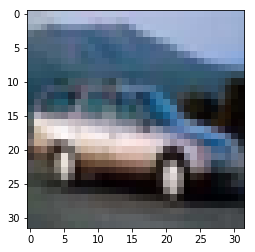

In [10]:
changeFeaturesType(data)
drawOrigImg(X)

In [11]:
def addLabelsBack(X):
    X['labels'] = labels
    print(X.head())

In [12]:
addLabelsBack(X)

       0      1      2      3      4      5      6      7      8      9  \
0   59.0   43.0   50.0   68.0   98.0  119.0  139.0  145.0  149.0  149.0   
1  154.0  126.0  105.0  102.0  125.0  155.0  172.0  180.0  142.0  111.0   
2  255.0  253.0  253.0  253.0  253.0  253.0  253.0  253.0  253.0  253.0   
3   28.0   37.0   38.0   42.0   44.0   40.0   40.0   24.0   32.0   43.0   
4  170.0  168.0  177.0  183.0  181.0  177.0  181.0  184.0  189.0  189.0   

    ...    3063  3064   3065   3066   3067   3068   3069   3070   3071  labels  
0   ...    58.0  65.0   59.0   46.0   57.0  104.0  140.0   84.0   72.0       6  
1   ...    42.0  67.0  101.0  122.0  133.0  136.0  139.0  142.0  144.0       9  
2   ...    83.0  80.0   69.0   66.0   72.0   79.0   83.0   83.0   84.0       9  
3   ...    39.0  59.0   42.0   44.0   48.0   38.0   28.0   37.0   46.0       4  
4   ...    88.0  85.0   82.0   83.0   79.0   78.0   82.0   78.0   80.0       1  

[5 rows x 3073 columns]


In [13]:
airplane = (X.loc[data['labels'] == 0])
automobile = (X.loc[data['labels'] == 1])
bird = (X.loc[data['labels'] == 2])
cat = (X.loc[data['labels'] == 3])
deer = (X.loc[data['labels'] == 4])
dog = (X.loc[data['labels'] == 5])
frog = (X.loc[data['labels'] == 6])
horse = (X.loc[data['labels'] == 7])
ship = (X.loc[data['labels'] == 8])
truck = (X.loc[data['labels'] == 9])

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)

In [15]:
def getPCA(category):
    xy = pd.DataFrame(category)
    features = xy.drop(labels = ['labels'],axis=1 )
    pca.fit(features)
    components = pca.transform(features)
    df = pd.DataFrame(components)
    invTransform(components)

In [16]:
def invTransform(components):
    projected = pca.inverse_transform(components)
    projected = pd.DataFrame(projected)
    projected = np.array(projected)
    drawNewImgs(projected)
    #print(projected.shape)

In [17]:
def drawNewImgs(projected):
    plt.figure(figsize=(2.5,10))
    plt.imshow(toimage(projected[0].reshape(3, 32,32))) 

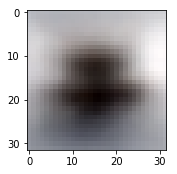

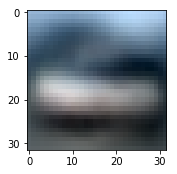

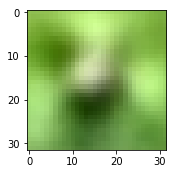

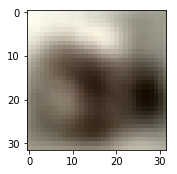

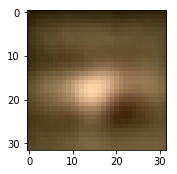

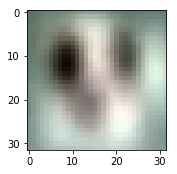

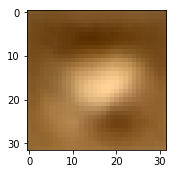

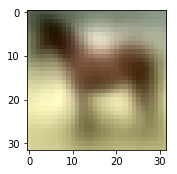

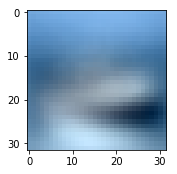

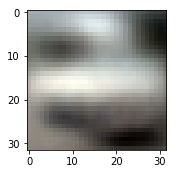

In [18]:
getPCA(airplane)
getPCA(automobile)
getPCA(bird)
getPCA(cat)
getPCA(deer)
getPCA(dog)
getPCA(frog)
getPCA(horse)
getPCA(ship)
getPCA(truck)

In [21]:
#using pca's explained_variance_ per @slackrw's comment on Slack and with assistance of Curt F: https://stackoverflow.com/questions/32857029/python-scikit-learn-pca-explained-variance-ratio-cutoff
hist = []

def calcError(pcaComponents):
    pca = PCA(n_components=3072)
    xy = pd.DataFrame(pcaComponents)
    features = xy.drop(labels = ['labels'],axis=1)
    pca.fit(features)
    components = pca.transform(features)
    pca.inverse_transform(components)
    var = pca.explained_variance_
    varDF = pd.DataFrame(var)
    varPlot = var[20:3071]
    varPlot = pd.DataFrame(varPlot)
    global sumVar
    sumVar = sum(varPlot.values)
    hist.append(sumVar)

In [22]:
calcError(airplane)
calcError(automobile)
calcError(bird)
calcError(cat)
calcError(deer)
calcError(dog)
calcError(frog)
calcError(horse)
calcError(ship)
calcError(truck)
print(hist)

[array([ 2620937.65588959]), array([ 3951334.36132907]), array([ 2448105.73220134]), array([ 3116998.35620522]), array([ 2180754.58354679]), array([ 3231651.95150854]), array([ 2630682.47815388]), array([ 3441664.86810693]), array([ 2441041.7593478]), array([ 4021764.22122319])]


In [23]:
def plotBarChart(hist):
    hist = pd.DataFrame(hist)
    labels = ['airplane', 'automobile', 'bird', 'cat' ,'dog', 'deer', 'frog', 'horse', 'ship', 'truck']
    labels = pd.DataFrame(labels)
    hist['labels'] = labels
    row = hist.iloc[:]
    row.index = hist['labels']
    row.plot(kind='bar', figsize=[30,10], fontsize=30)

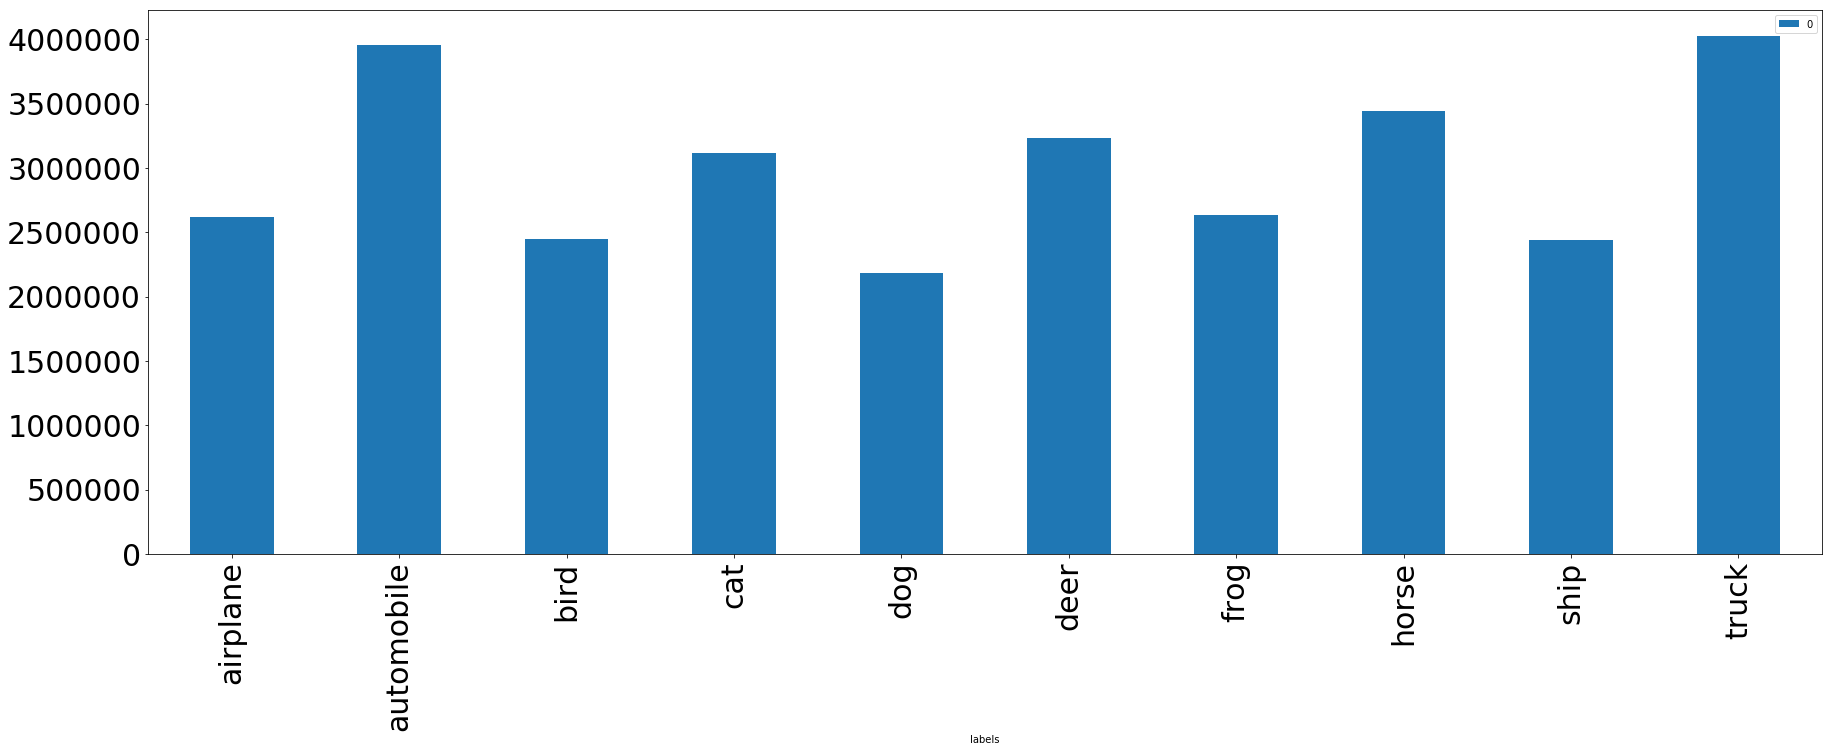

In [24]:
plotBarChart(hist)